In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.datasets import make_moons, make_circles

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors # for DBSCAN tuning
import hdbscan
from sklearn.cluster import Birch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import SpectralClustering

pd.set_option('display.max_columns', None)

## Data

#### Wine

In [4]:
wine_data = pd.read_csv('/Users/ayan/Downloads/wine-clustering.csv')
wine_data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
wine_data.shape

(178, 13)

In [6]:
wine_data.isnull().values.any()

False

In [7]:
wine_scaled = StandardScaler().fit_transform(wine_data)

In [7]:
for k in range(2,11):    
    wine_kmeans = KMeans(n_clusters=k).fit(wine_scaled)
    wine_kmeans_labels = wine_kmeans.labels_

    silhouette_score: float = metrics.silhouette_score(X=wine_scaled, labels=wine_kmeans_labels)
    print('K is: ', k, ' Silhouette score is: ', silhouette_score)

K is:  2  Silhouette score is:  0.25931695553182543
K is:  3  Silhouette score is:  0.2848589191898987
K is:  4  Silhouette score is:  0.2482864188966861
K is:  5  Silhouette score is:  0.1995760877365116
K is:  6  Silhouette score is:  0.21216108941930545
K is:  7  Silhouette score is:  0.1537005075890148
K is:  8  Silhouette score is:  0.1353654068563225
K is:  9  Silhouette score is:  0.15421436210992387
K is:  10  Silhouette score is:  0.1479612252300968


In [31]:
# threshold_values = list(np.linspace(0.1,1,10))
threshold_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [19]:
wine_ac = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward').fit(wine_scaled)
wine_ac_labels = wine_ac.labels_

silhouette_score: float = metrics.silhouette_score(X=wine_scaled, labels=wine_ac_labels)
print(' Silhouette score is: ', silhouette_score)

 Silhouette score is:  0.2774439826952266


In [20]:
wine_sc = SpectralClustering(
    n_clusters=3,
).fit(wine_scaled)
wine_sc_labels = wine_sc.labels_

silhouette_score: float = metrics.silhouette_score(X=wine_scaled, labels=wine_sc_labels)
print(' Silhouette score is: ', silhouette_score)

 Silhouette score is:  0.24855292006311666


In [23]:
wine_hdbscan = hdbscan.HDBSCAN(gen_min_span_tree=True).fit(wine_scaled)
wine_hdbscan_labels = wine_hdbscan.labels_

silhouette_score: float = metrics.silhouette_score(X=wine_scaled, labels=wine_hdbscan_labels)
print('Silhouette score is: ', silhouette_score)
print('HDBV score is: ', wine_hdbscan.relative_validity_)

 Silhouette score is:  0.09852054318649339
HDBV score is:  0.0016109621376403285


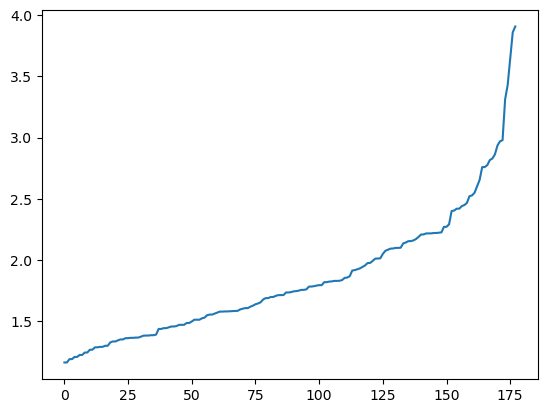

In [31]:
neighbors = NearestNeighbors(n_neighbors=26).fit(wine_scaled)
distances, indices = neighbors.kneighbors(wine_scaled)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.show()

In [38]:
wine_dbscan = DBSCAN(eps=5, min_samples=2).fit(wine_data)
wine_dbscan_labels = wine_dbscan.labels_

silhouette_score: float = metrics.silhouette_score(X=wine_data, labels=wine_dbscan_labels)
print('Silhouette score is: ', silhouette_score)

Silhouette score is:  -0.6096409692792942


#### Beer

In [39]:
beer_data = pd.read_csv('/Users/ayan/Downloads/archive (2)/beer_profile_and_ratings.csv')
beer_data.head()

,Name,Style,Brewery,Beer Name (Full),Description,ABV,Min IBU,Max IBU,Astringency,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty,review_aroma,review_appearance,review_palate,review_taste,review_overall,number_of_reviews
0,Amber,Altbier,Alaskan Brewing Co.,Alaskan Brewing Co. Alaskan Amber,"Notes:Richly malty and long on the palate, wit...",5.3,25,50,13,32,9,47,74,33,0,33,57,8,111,3.498994,3.636821,3.556338,3.643863,3.847082,497
1,Double Bag,Altbier,Long Trail Brewing Co.,Long Trail Brewing Co. Double Bag,"Notes:This malty, full-bodied double alt is al...",7.2,25,50,12,57,18,33,55,16,0,24,35,12,84,3.798337,3.846154,3.904366,4.024948,4.034304,481
2,Long Trail Ale,Altbier,Long Trail Brewing Co.,Long Trail Brewing Co. Long Trail Ale,Notes:Long Trail Ale is a full-bodied amber al...,5.0,25,50,14,37,6,42,43,11,0,10,54,4,62,3.409814,3.667109,3.600796,3.631300,3.830239,377
3,Doppelsticke,Altbier,Uerige Obergärige Hausbrauerei GmbH / Zum Uerige,Uerige Obergärige Hausbrauerei GmbH / Zum Ueri...,Notes:,8.5,25,50,13,55,31,47,101,18,1,49,40,16,119,4.148098,4.033967,4.150815,4.205163,4.005435,368
4,Sleigh'r Dark Doüble Alt Ale,Altbier,Ninkasi Brewing Company,Ninkasi Brewing Company Sleigh'r Dark Doüble A...,Notes:Called 'Dark Double Alt' on the label.Se...,7.2,25,50,25,51,26,44,45,9,1,11,51,20,95,3.625000,3.973958,3.734375,3.765625,3.817708,96


In [40]:
beer_data.shape

(3197, 25)

In [41]:
beer_data.isnull().values.any()

False

In [42]:
beer_true_lables = beer_data.Style.tolist()
drop_columns = [
    'Name', 
    'Style', 
    'Brewery', 
    'Beer Name (Full)', 
    'Description', 
    'review_aroma', 
    'review_appearance', 
    'review_palate', 
    'review_taste', 
    'review_overall', 
    'number_of_reviews',
]
beer_cleaned = beer_data.drop(columns=drop_columns)
beer_cleaned.head()

,ABV,Min IBU,Max IBU,Astringency,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty
0,5.3,25,50,13,32,9,47,74,33,0,33,57,8,111
1,7.2,25,50,12,57,18,33,55,16,0,24,35,12,84
2,5.0,25,50,14,37,6,42,43,11,0,10,54,4,62
3,8.5,25,50,13,55,31,47,101,18,1,49,40,16,119
4,7.2,25,50,25,51,26,44,45,9,1,11,51,20,95


In [43]:
beer_scaled = StandardScaler().fit_transform(beer_cleaned)

In [19]:
for k in range(2,11):    
    beer_kmeans = KMeans(n_clusters=k).fit(beer_scaled)
    beer_kmeans_labels = beer_kmeans.labels_

    silhouette_score: float = metrics.silhouette_score(X=beer_scaled, labels=beer_kmeans_labels)
    print('K is: ', k, ' Silhouette score is: ', silhouette_score)

K is:  2  Silhouette score is:  0.18412451606848595
K is:  3  Silhouette score is:  0.18284166451682438
K is:  4  Silhouette score is:  0.17133964309271182
K is:  5  Silhouette score is:  0.18921508225690564
K is:  6  Silhouette score is:  0.18466753805608208
K is:  7  Silhouette score is:  0.18984616582924163
K is:  8  Silhouette score is:  0.19364467550858466
K is:  9  Silhouette score is:  0.1817291207736417
K is:  10  Silhouette score is:  0.17763105972172952


In [48]:
for k in range(2, 11):
    beer_ac = AgglomerativeClustering(n_clusters=k).fit(beer_scaled)
    beer_ac_labels = beer_ac.labels_

    silhouette_score: float = metrics.silhouette_score(X=beer_scaled, labels=beer_ac_labels)
    print('K is: ', k, ' Silhouette score is: ', silhouette_score)

K is:  2  Silhouette score is:  0.14351218006317157
K is:  3  Silhouette score is:  0.10743303001067174
K is:  4  Silhouette score is:  0.12441278030852362
K is:  5  Silhouette score is:  0.1315649951164907
K is:  6  Silhouette score is:  0.1405693108730537
K is:  7  Silhouette score is:  0.14542021260945062
K is:  8  Silhouette score is:  0.14766223346841714
K is:  9  Silhouette score is:  0.144269404363516
K is:  10  Silhouette score is:  0.11963276319306662


In [47]:
for k in range(2, 11):
    beer_sc = SpectralClustering(
        n_clusters=k,
    ).fit(beer_scaled)
    beer_sc_labels = beer_sc.labels_

    silhouette_score: float = metrics.silhouette_score(X=beer_scaled, labels=beer_sc_labels)
    print('K is: ', k, ' Silhouette score is: ', silhouette_score)

K is:  2  Silhouette score is:  0.7615113730640789
K is:  3  Silhouette score is:  0.7289891583672107
K is:  4  Silhouette score is:  0.45408818812314633
K is:  5  Silhouette score is:  0.33774693551744456
K is:  6  Silhouette score is:  0.17643399404373145
K is:  7  Silhouette score is:  0.1115311083056965
K is:  8  Silhouette score is:  0.13271293334380063
K is:  9  Silhouette score is:  0.14299964770486892
K is:  10  Silhouette score is:  0.15012132698427635


## Generate Density Data
#### Moons

Rand score is:  0.7447447447447447


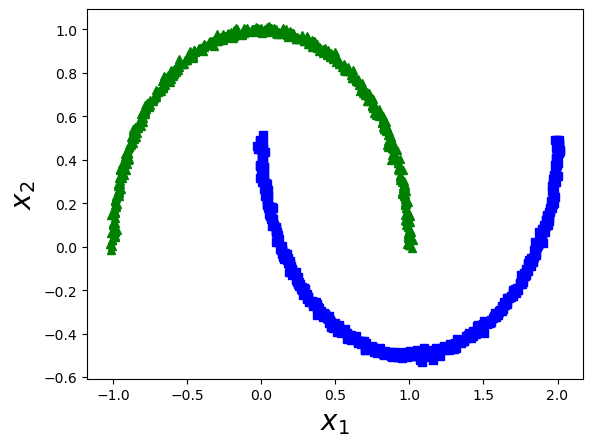

Rand score is:  0.7391711711711711


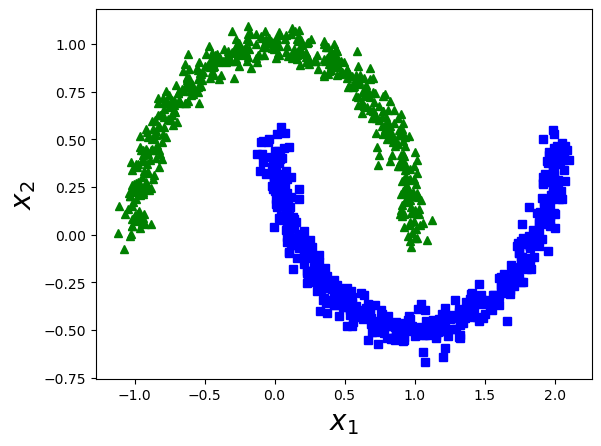

Rand score is:  0.730930930930931


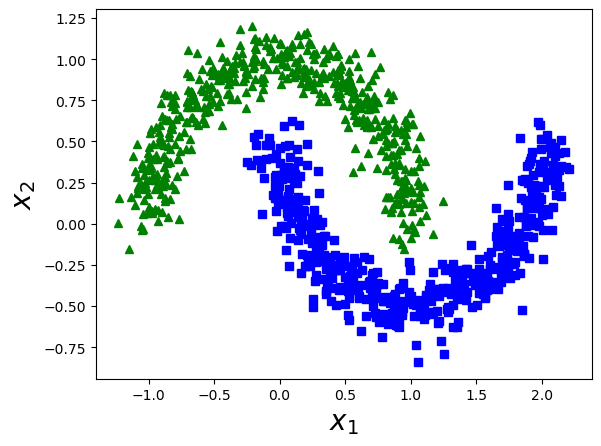

Rand score is:  0.7364084084084084


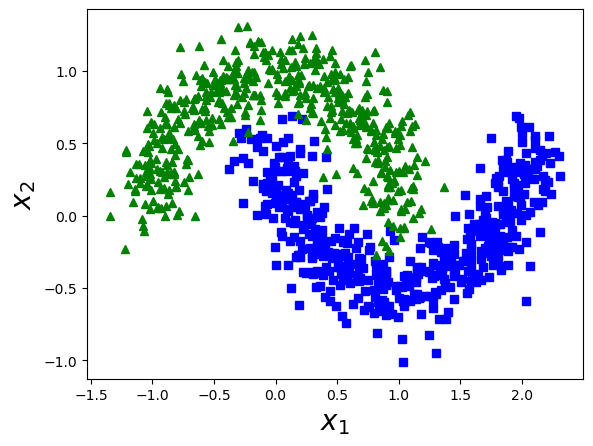

Rand score is:  0.7405585585585586


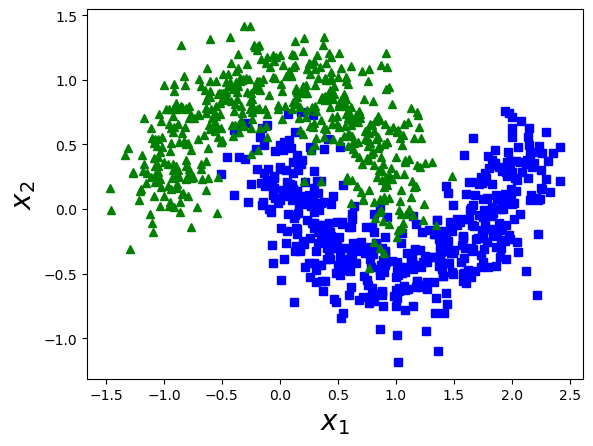

In [12]:
noise_lvls = [0.01, 0.05, 0.1, 0.15, 0.2]

for lvl in noise_lvls:
    X1, y1 = make_moons(n_samples=1_000, noise=lvl, random_state=17)
    
    X1_scaled = StandardScaler().fit_transform(X1)

    X1_kmeans = KMeans(n_clusters=2).fit(X1_scaled)
    X1_kmeans_labels = X1_kmeans.labels_

    rand_score = metrics.rand_score(y1, X1_kmeans_labels)
    print('Rand score is: ', rand_score)
    
    plt.plot(X1[:, 0][y1==1], X1[:, 1][y1==1], "bs")
    plt.plot(X1[:, 0][y1==0], X1[:, 1][y1==0], "g^")

    # X contains two features, x1 and x2
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20)

    # Displaying the plot.
    plt.show()

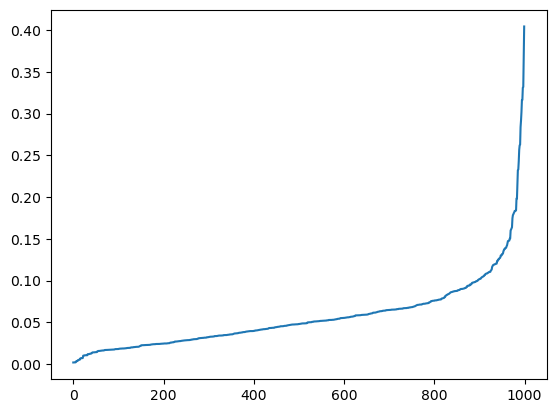

In [13]:
neighbors = NearestNeighbors(n_neighbors=26).fit(X1_scaled)
distances, indices = neighbors.kneighbors(X1_scaled)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.show()

Rand score is:  1.0


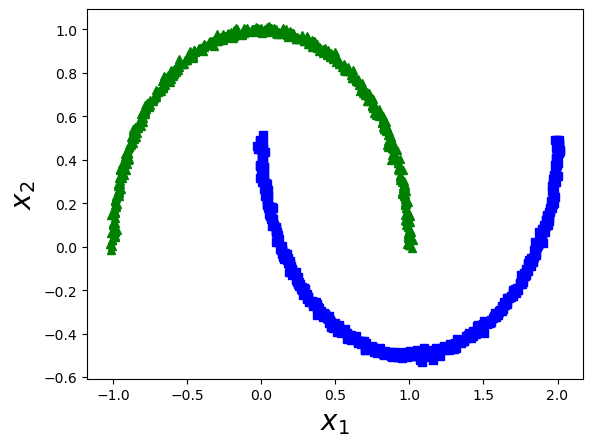

Rand score is:  1.0


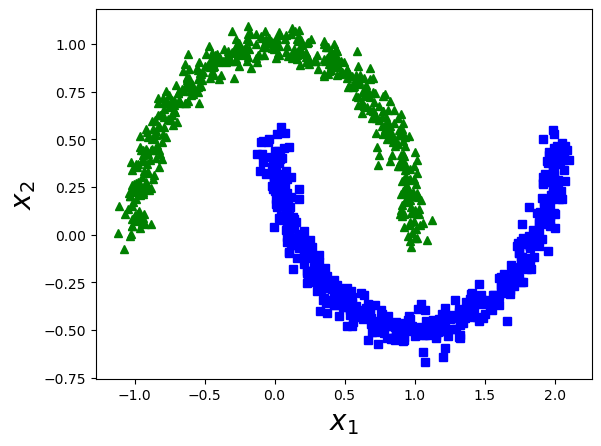

Rand score is:  0.9861081081081081


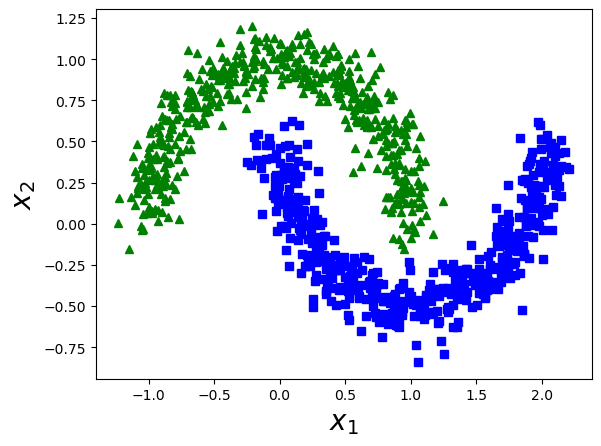

Rand score is:  0.9241661661661662


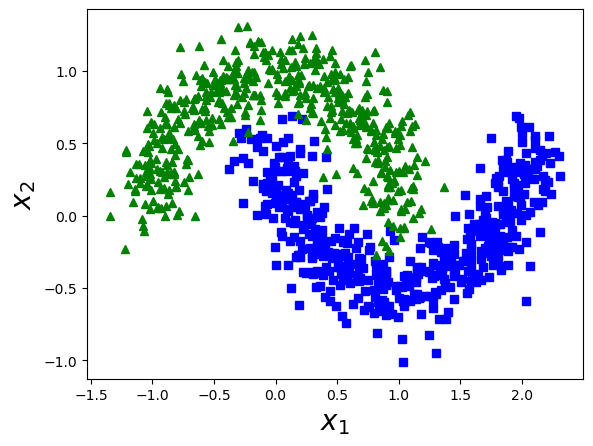

Rand score is:  0.4995975975975976


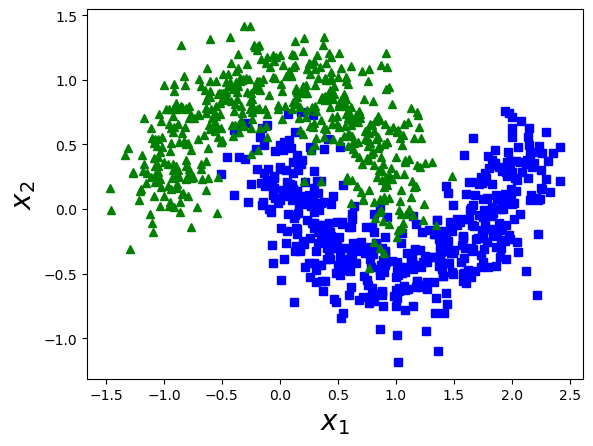

In [15]:
for lvl in noise_lvls:
    X1, y1 = make_moons(n_samples=1_000, noise=lvl, random_state=17)
    
    X1_scaled = StandardScaler().fit_transform(X1)

    X1_dbscan = DBSCAN(eps=0.20, min_samples=10).fit(X1_scaled)
    X1_dbscan_labels = X1_dbscan.labels_

    rand_score = metrics.rand_score(y1, X1_dbscan_labels)
    print('Rand score is: ', rand_score)
    
    plt.plot(X1[:, 0][y1==1], X1[:, 1][y1==1], "bs")
    plt.plot(X1[:, 0][y1==0], X1[:, 1][y1==0], "g^")

    # X contains two features, x1 and x2
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20)

    # Displaying the plot.
    plt.show()

Rand score is:  1.0


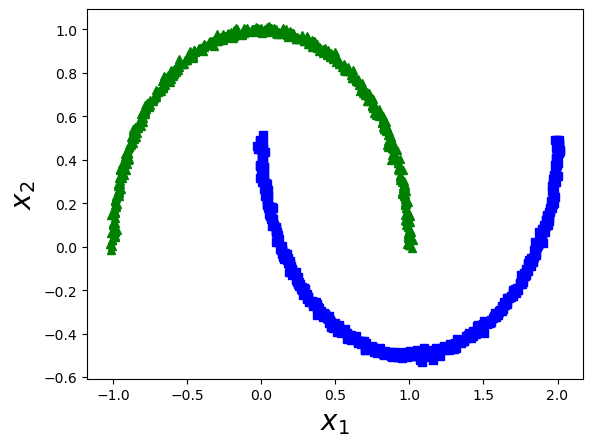

Rand score is:  1.0


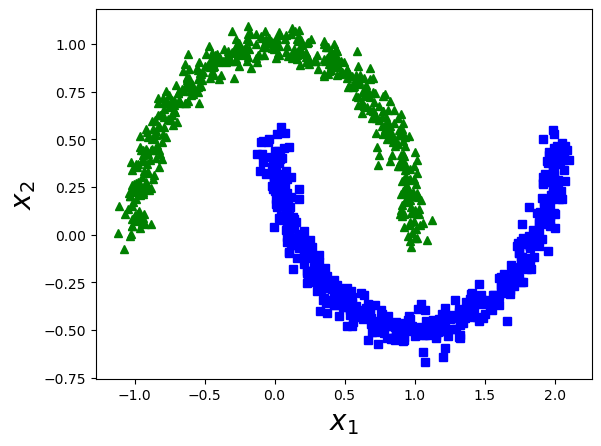

Rand score is:  0.9880660660660661


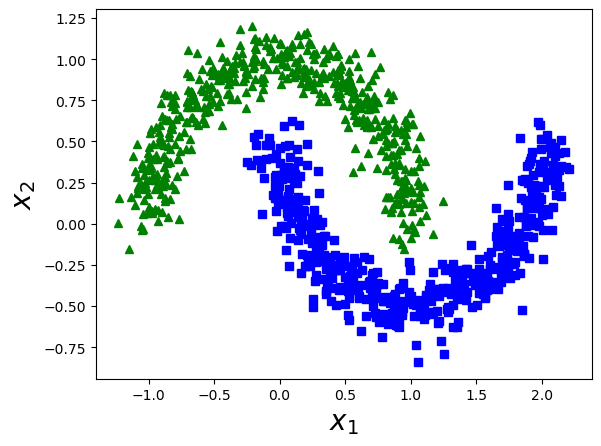

Rand score is:  0.5197697697697697


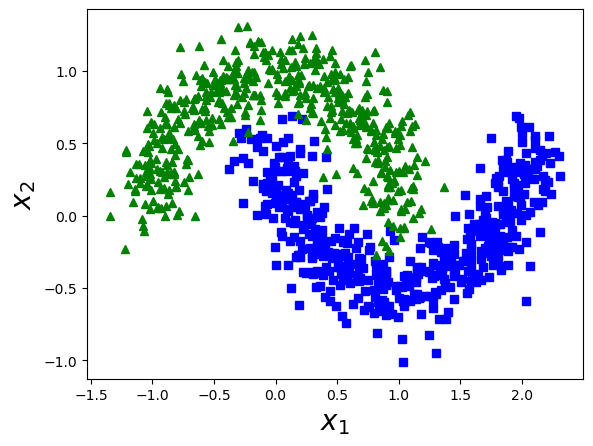

Rand score is:  0.5078218218218218


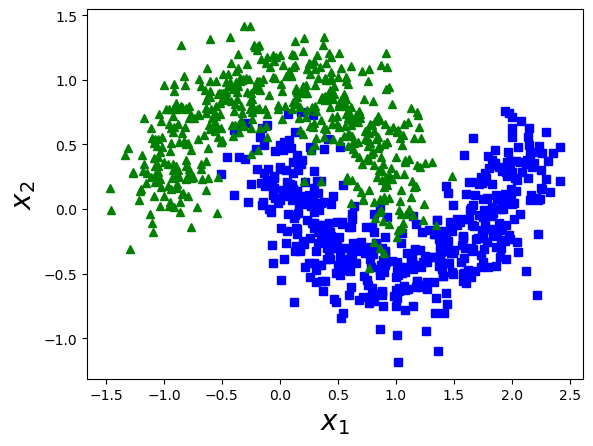

In [16]:
for lvl in noise_lvls:
    X1, y1 = make_moons(n_samples=1_000, noise=lvl, random_state=17)
    
    X1_scaled = StandardScaler().fit_transform(X1)

    X1_hdbscan = hdbscan.HDBSCAN().fit(X1_scaled)
    X1_hdbscan_labels = X1_hdbscan.labels_

    rand_score = metrics.rand_score(y1, X1_hdbscan_labels)
    print('Rand score is: ', rand_score)
    
    plt.plot(X1[:, 0][y1==1], X1[:, 1][y1==1], "bs")
    plt.plot(X1[:, 0][y1==0], X1[:, 1][y1==0], "g^")

    # X contains two features, x1 and x2
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20)

    # Displaying the plot.
    plt.show()

Rand score is:  0.7735735735735736


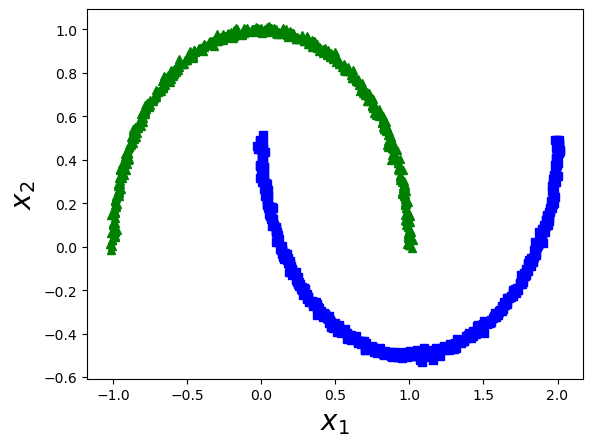

Rand score is:  0.7720940940940941


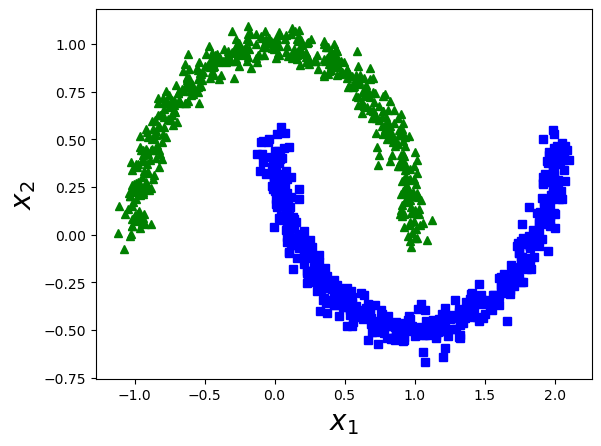

Rand score is:  0.7676796796796796


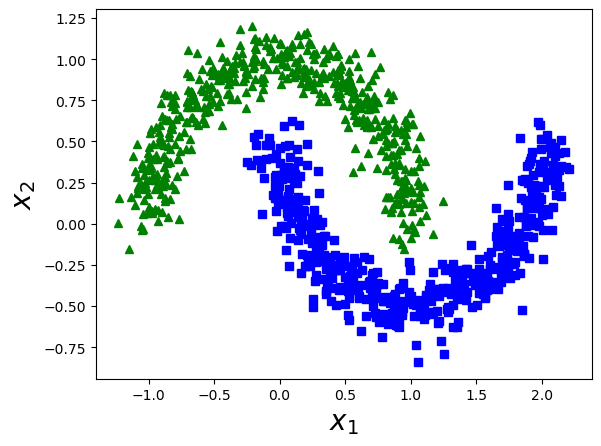

Rand score is:  0.7618498498498498


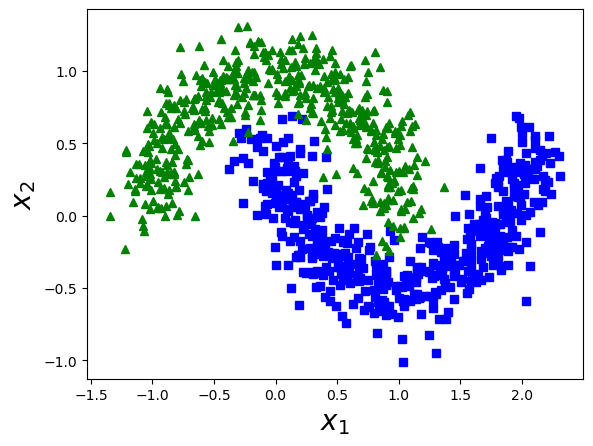

Rand score is:  0.7503823823823824


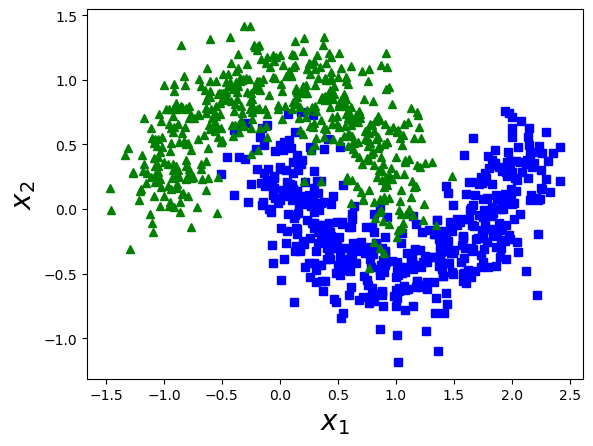

In [17]:
for lvl in noise_lvls:
    X1, y1 = make_moons(n_samples=1_000, noise=lvl, random_state=17)
    
    X1_scaled = StandardScaler().fit_transform(X1)

    X1_sc = SpectralClustering(
        n_clusters=2,
    ).fit(X1_scaled)
    X1_sc_labels = X1_sc.labels_

    rand_score = metrics.rand_score(y1, X1_sc_labels)
    print('Rand score is: ', rand_score)
    
    plt.plot(X1[:, 0][y1==1], X1[:, 1][y1==1], "bs")
    plt.plot(X1[:, 0][y1==0], X1[:, 1][y1==0], "g^")

    # X contains two features, x1 and x2
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20)

    # Displaying the plot.
    plt.show()

Rand score is:  0.8166246246246246


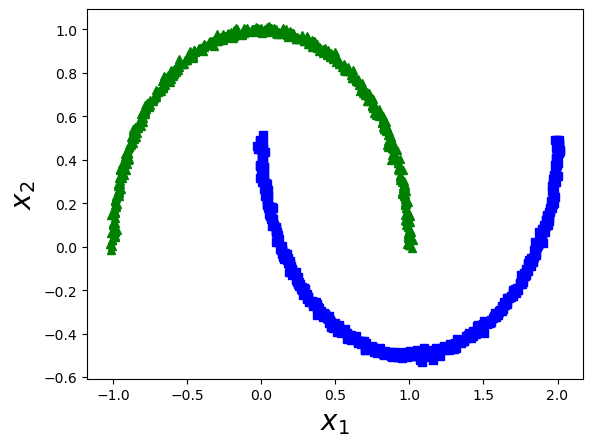

Rand score is:  0.8393273273273273


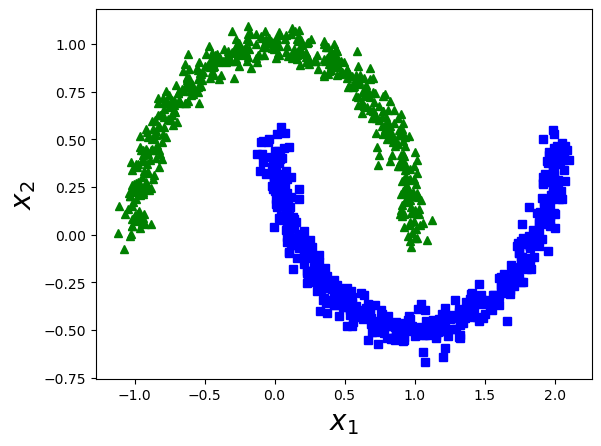

Rand score is:  0.748966966966967


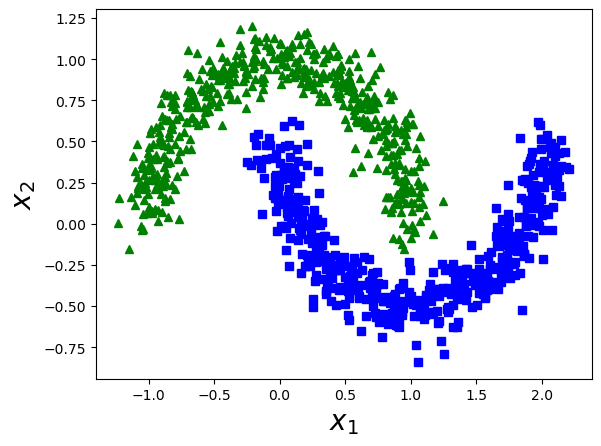

Rand score is:  0.8008888888888889


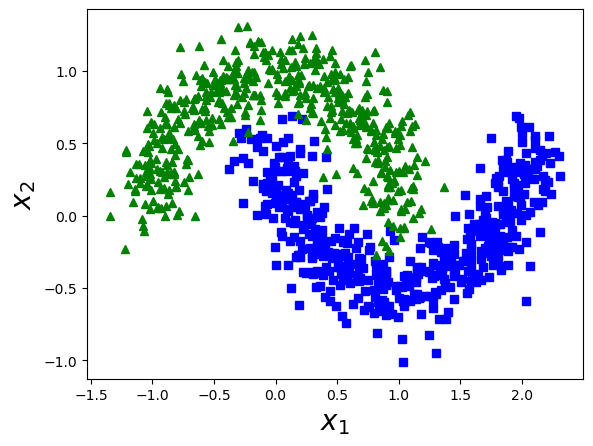

Rand score is:  0.7188408408408409


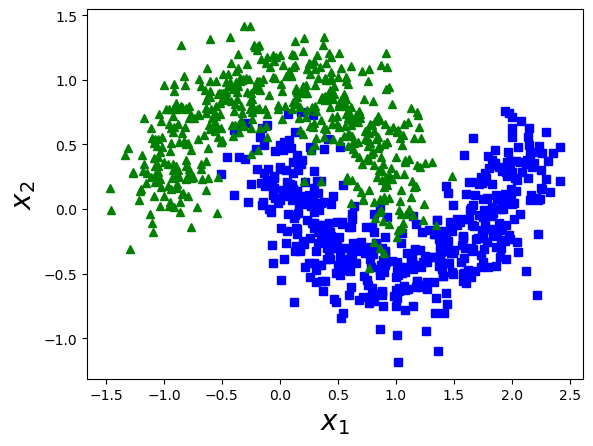

In [18]:
for lvl in noise_lvls:
    X1, y1 = make_moons(n_samples=1_000, noise=lvl, random_state=17)
    
    X1_scaled = StandardScaler().fit_transform(X1)

    X1_ac = AgglomerativeClustering(n_clusters=2).fit(X1_scaled)
    X1_ac_labels = X1_ac.labels_

    rand_score = metrics.rand_score(y1, X1_ac_labels)
    print('Rand score is: ', rand_score)
    
    plt.plot(X1[:, 0][y1==1], X1[:, 1][y1==1], "bs")
    plt.plot(X1[:, 0][y1==0], X1[:, 1][y1==0], "g^")

    # X contains two features, x1 and x2
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20)

    # Displaying the plot.
    plt.show()

Rand score is:  0.4995015015015015


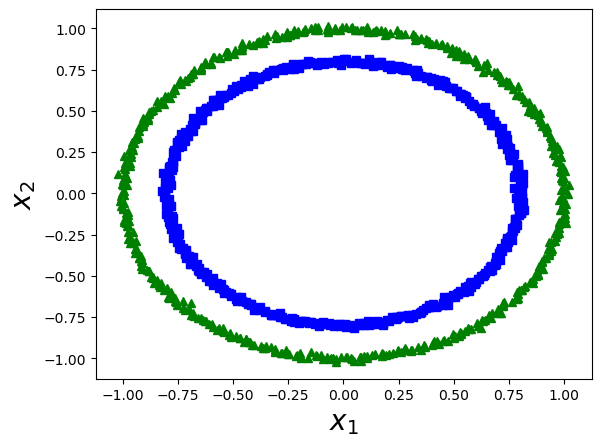

Rand score is:  0.49954954954954955


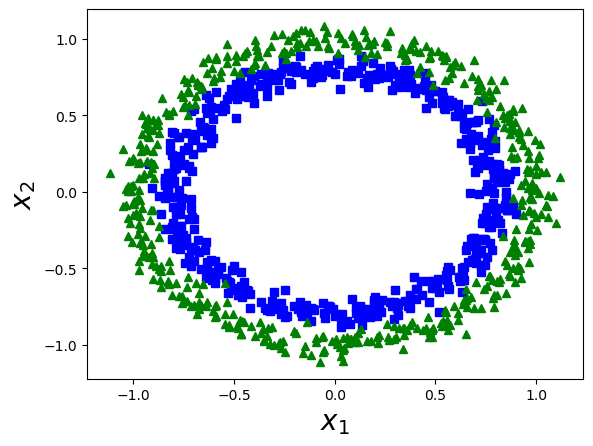

Rand score is:  0.4995315315315315


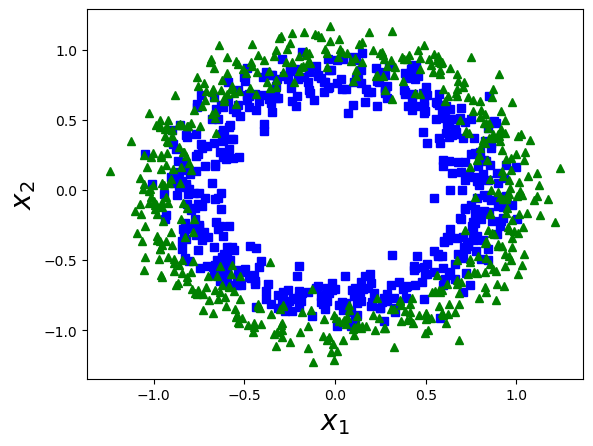

Rand score is:  0.4995075075075075


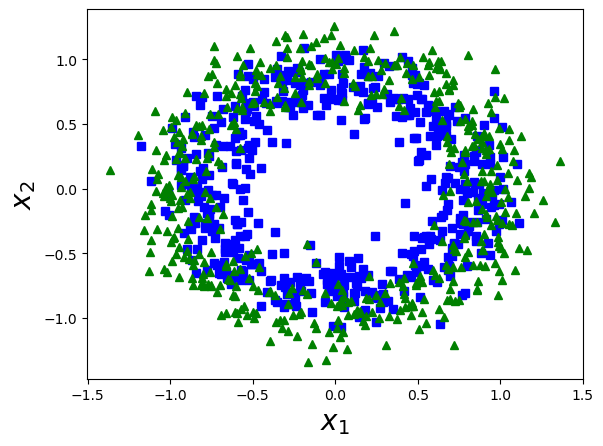

Rand score is:  0.4995075075075075


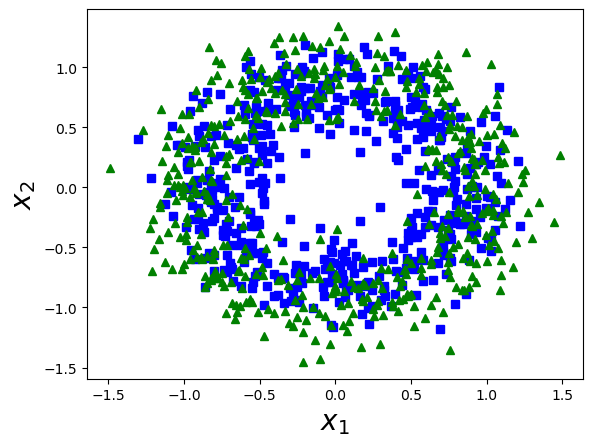

In [19]:
for lvl in noise_lvls:
    X, y = make_circles(n_samples=1_000, noise=lvl, random_state=17)
    
    X_scaled = StandardScaler().fit_transform(X)

    X_kmeans = KMeans(n_clusters=2).fit(X_scaled)
    X_kmeans_labels = X_kmeans.labels_

    rand_score = metrics.rand_score(y, X_kmeans_labels)
    print('Rand score is: ', rand_score)
    
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "g^")

    # X contains two features, x1 and x2
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20)

    # Displaying the plot.
    plt.show()

Rand score is:  1.0


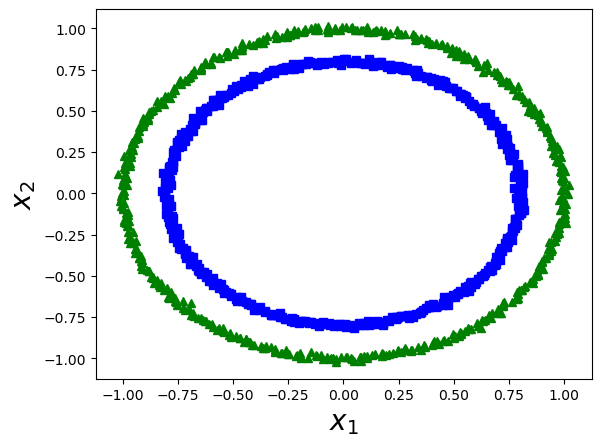

Rand score is:  0.5181701701701702


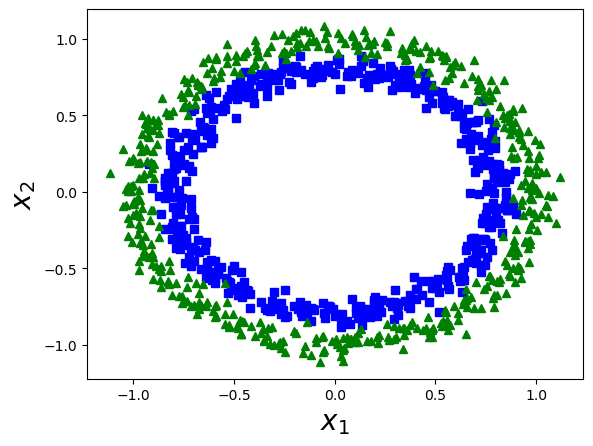

Rand score is:  0.5043203203203204


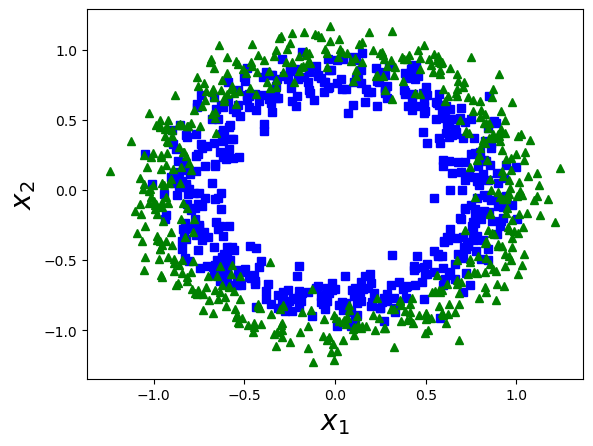

Rand score is:  0.5020880880880881


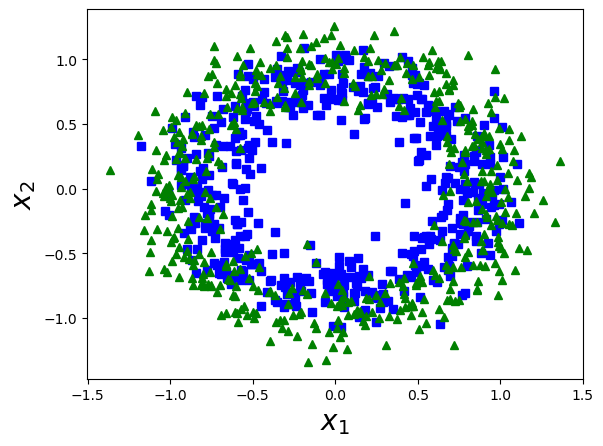

Rand score is:  0.5019739739739739


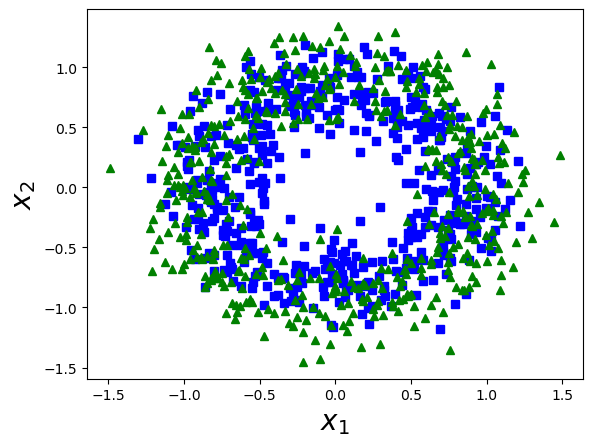

In [20]:
for lvl in noise_lvls:
    X, y = make_circles(n_samples=1_000, noise=lvl, random_state=17)
    
    X_scaled = StandardScaler().fit_transform(X)

    X_hdbscan = hdbscan.HDBSCAN().fit(X_scaled)
    X_hdbscan_labels = X_hdbscan.labels_

    rand_score = metrics.rand_score(y, X_hdbscan_labels)
    print('Rand score is: ', rand_score)
    
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "g^")

    # X contains two features, x1 and x2
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20)

    # Displaying the plot.
    plt.show()

Rand score is:  0.4995075075075075


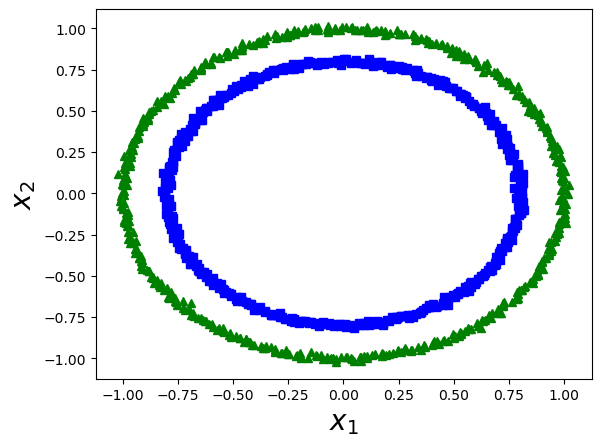

Rand score is:  0.4995075075075075


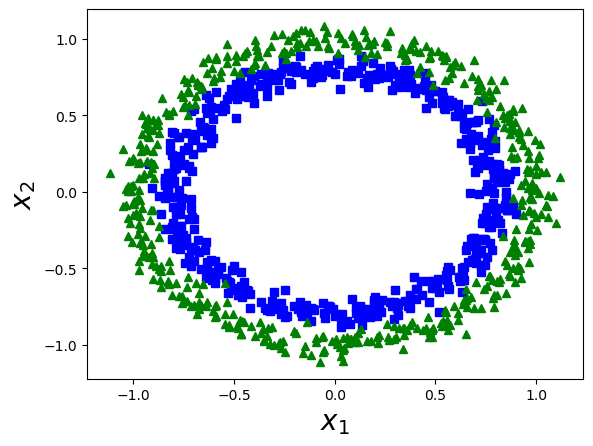

Rand score is:  0.49954954954954955


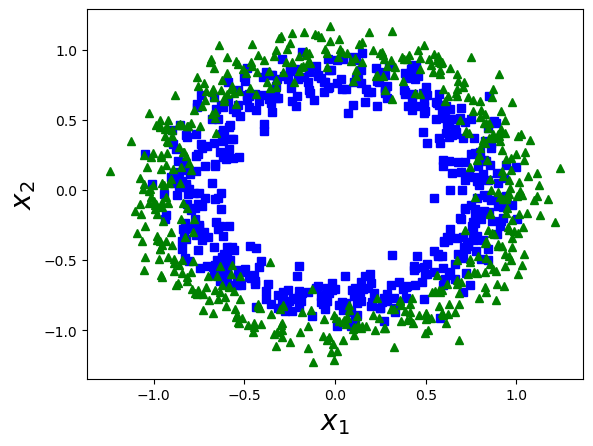

Rand score is:  0.49954954954954955


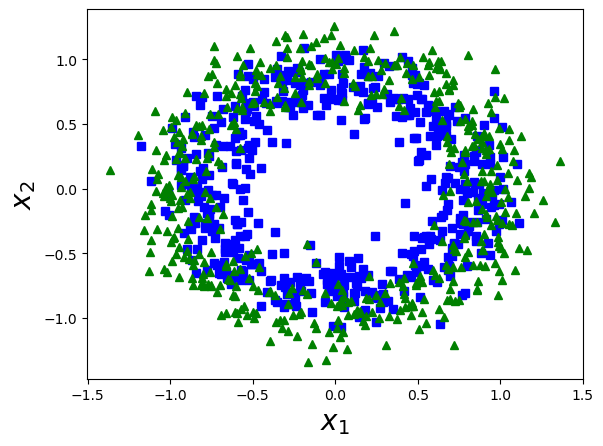

Rand score is:  0.4995015015015015


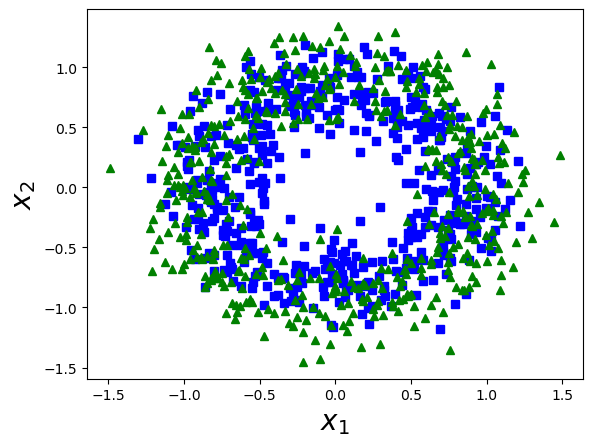

In [21]:
for lvl in noise_lvls:
    X, y = make_circles(n_samples=1_000, noise=lvl, random_state=17)
    
    X_scaled = StandardScaler().fit_transform(X)

    X_sc = SpectralClustering(
        n_clusters=2,
    ).fit(X_scaled)
    X_sc_labels = X_sc.labels_

    rand_score = metrics.rand_score(y, X_sc_labels)
    print('Rand score is: ', rand_score)
    
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "g^")

    # X contains two features, x1 and x2
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20)

    # Displaying the plot.
    plt.show()

Rand score is:  0.49983783783783786


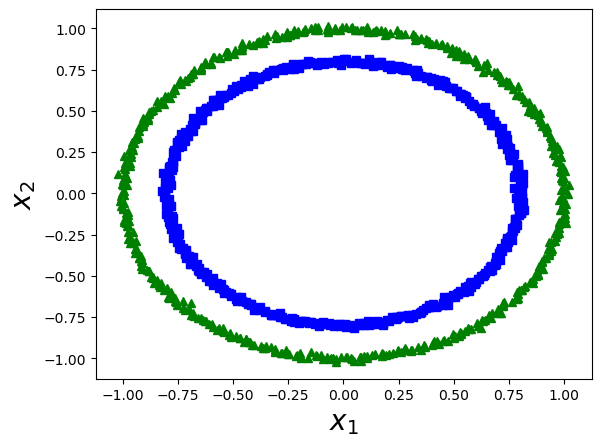

Rand score is:  0.49957157157157156


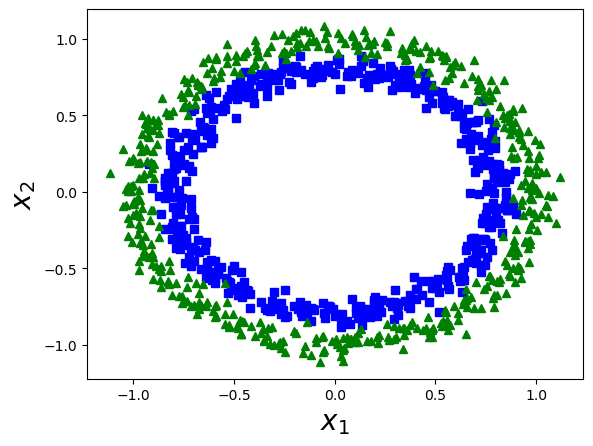

Rand score is:  0.49954954954954955


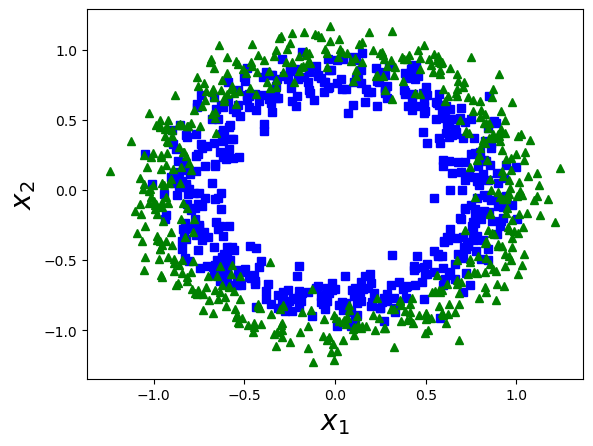

Rand score is:  0.4995015015015015


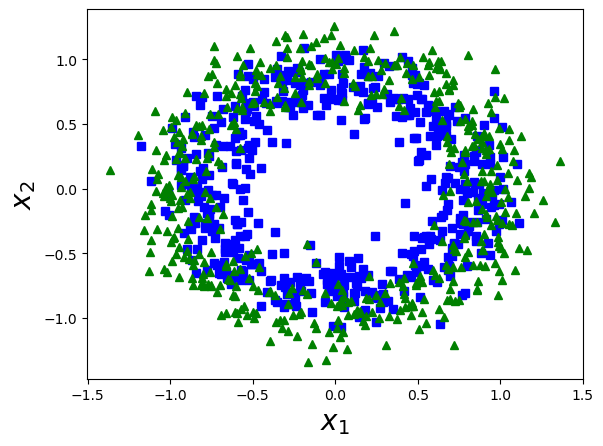

Rand score is:  0.49954954954954955


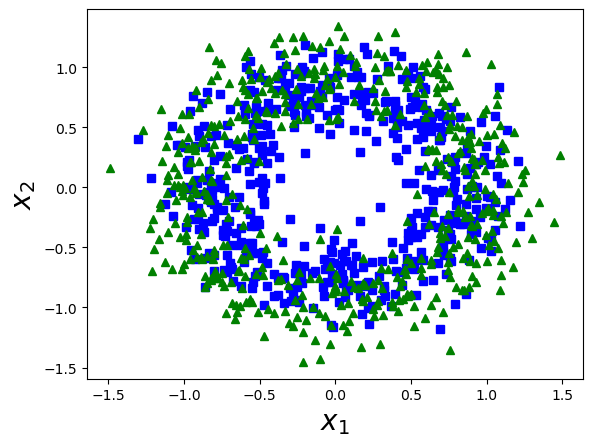

In [22]:
for lvl in noise_lvls:
    X, y = make_circles(n_samples=1_000, noise=lvl, random_state=17)
    
    X_scaled = StandardScaler().fit_transform(X)

    X_ac = AgglomerativeClustering(n_clusters=2).fit(X_scaled)
    X_ac_labels = X_ac.labels_

    rand_score = metrics.rand_score(y, X_ac_labels)
    print('Rand score is: ', rand_score)
    
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "g^")

    # X contains two features, x1 and x2
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20)

    # Displaying the plot.
    plt.show()

In [ ]:
neighbors = NearestNeighbors(n_neighbors=4).fit(X_scaled)
distances, indices = neighbors.kneighbors(X_scaled)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.show()

/var/folders/k9/m9q_29c95h182lx7dl04_x3w0000gn/T/ipykernel_1823/3184692321.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  moon_data1_subset0.x = moon_data1_subset0.x + 3
/var/folders/k9/m9q_29c95h182lx7dl04_x3w0000gn/T/ipykernel_1823/3184692321.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  moon_data1_subset0.y = moon_data1_subset0.y + 3
/var/folders/k9/m9q_29c95h182lx7dl04_x3w0000gn/T/ipykernel_1823/3184692321.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

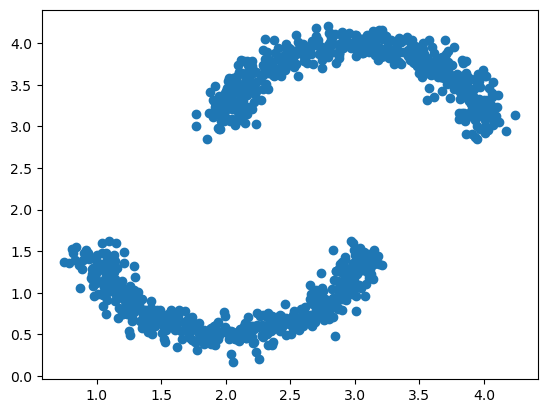

In [42]:
X1, y1 = make_moons(n_samples=1_000, noise=0.1, random_state=17)

moon_data1 = pd.DataFrame(X1, columns = ['x','y'])
moon_data1['labels'] = y1

moon_data1_subset1 = moon_data1[moon_data1.labels == 1]
moon_data1_subset0 = moon_data1[moon_data1.labels == 0]

moon_data1_subset0.x = moon_data1_subset0.x + 3
moon_data1_subset0.y = moon_data1_subset0.y + 3

moon_data1_subset1.x = moon_data1_subset1.x + 1
moon_data1_subset1.y = moon_data1_subset1.y + 1

moon_data1_trans = pd.concat(objs=[moon_data1_subset0, moon_data1_subset1])

plt.plot(moon_data1_trans.x, moon_data1_trans.y, 'o')
plt.show()

#### Circles

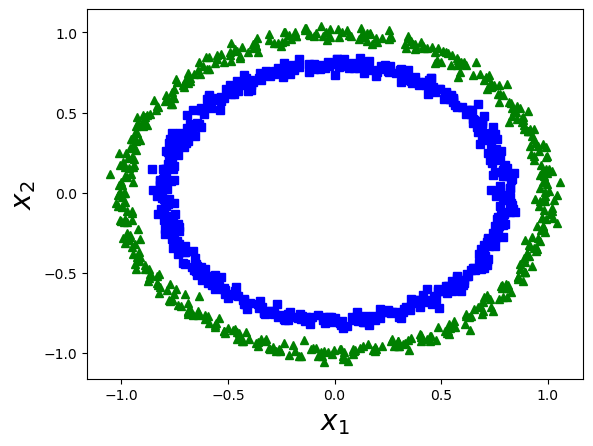

In [48]:
X, y = make_circles(n_samples=1_000, noise=0.025, random_state=17)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "g^")

# X contains two features, x1 and x2
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$", fontsize=20)

# Displaying the plot.
plt.show()

/var/folders/k9/m9q_29c95h182lx7dl04_x3w0000gn/T/ipykernel_1823/2690593354.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  circles_data1_subset0.x = circles_data1_subset0.x + 5
/var/folders/k9/m9q_29c95h182lx7dl04_x3w0000gn/T/ipykernel_1823/2690593354.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  circles_data1_subset0.y = circles_data1_subset0.y + 5
/var/folders/k9/m9q_29c95h182lx7dl04_x3w0000gn/T/ipykernel_1823/2690593354.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

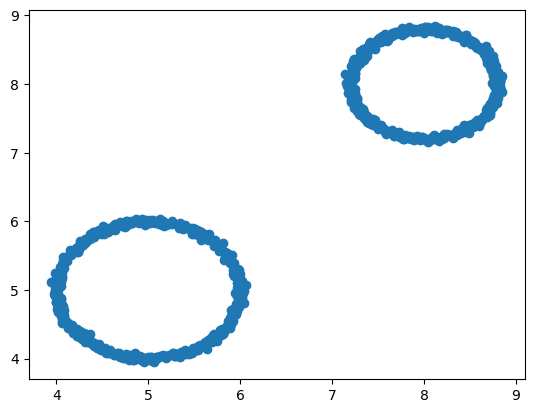

In [49]:
circles_data1 = pd.DataFrame(X, columns = ['x','y'])
circles_data1['labels'] = y

circles_data1_subset1 = circles_data1[circles_data1.labels == 1]
circles_data1_subset0 = circles_data1[circles_data1.labels == 0]

circles_data1_subset0.x = circles_data1_subset0.x + 5
circles_data1_subset0.y = circles_data1_subset0.y + 5

circles_data1_subset1.x = circles_data1_subset1.x + 8
circles_data1_subset1.y = circles_data1_subset1.y + 8

circles_data1_trans = pd.concat(objs=[circles_data1_subset0, circles_data1_subset1])

plt.plot(circles_data1_trans.x, circles_data1_trans.y, 'o')
plt.show()

In [52]:
circles_data1_trans.labels = np.where(circles_data1_trans.labels == 0, 2, 3)
circles_data1_trans.labels.value_counts()

2    500
3    500
Name: labels, dtype: int64

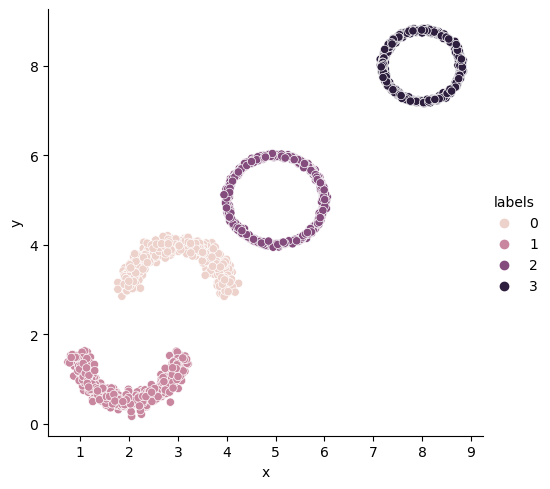

In [53]:
moon_circles_data = pd.concat(objs=[moon_data1_trans, circles_data1_trans])

sns.relplot(data=moon_circles_data, x='x', y='y', hue='labels')

In [54]:
moon_circles_data.to_csv(path_or_buf='moon_circles_data.csv', index=False)

#### Lines

/var/folders/k9/m9q_29c95h182lx7dl04_x3w0000gn/T/ipykernel_6270/1745165592.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lines_data_subset0.x = lines_data_subset0.x + 15
/var/folders/k9/m9q_29c95h182lx7dl04_x3w0000gn/T/ipykernel_6270/1745165592.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lines_data_subset1.x = lines_data_subset1.x + 15
/var/folders/k9/m9q_29c95h182lx7dl04_x3w0000gn/T/ipykernel_6270/1745165592.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

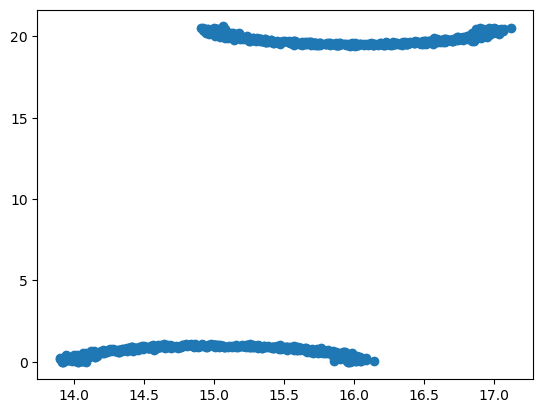

In [2]:
X2, y2 = make_moons(n_samples=1_000, noise=0.05, random_state=3)
lines_data = pd.DataFrame(X2, columns = ['x','y'])
lines_data['labels'] = y2

lines_data_subset1 = lines_data[lines_data.labels == 1]
lines_data_subset0 = lines_data[lines_data.labels == 0]

lines_data_subset0.x = lines_data_subset0.x + 15

lines_data_subset1.x = lines_data_subset1.x + 15
lines_data_subset1.y = lines_data_subset1.y + 20

lines_data_trans = pd.concat(objs=[lines_data_subset0, lines_data_subset1])

plt.plot(lines_data_trans.x, lines_data_trans.y, 'o')
plt.show()

In [3]:
lines_data_trans.labels = np.where(lines_data_trans.labels == 0, 4, 5)
lines_data_trans.labels.value_counts()

4    500
5    500
Name: labels, dtype: int64

In [4]:
moon_circles_data = pd.read_csv(filepath_or_buffer='moon_circles_data.csv')
moon_circles_data.head()

,x,y,labels
0,1.852964,2.847172,0
1,3.276231,4.039418,0
2,3.789944,3.546834,0
3,3.811824,3.509678,0
4,3.957863,3.511536,0


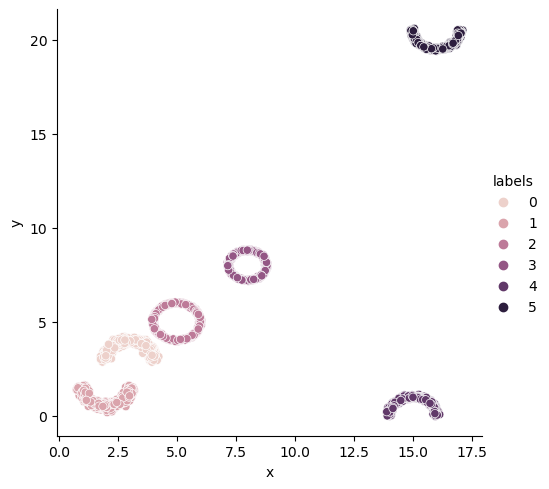

In [5]:
moon_circles_lines = pd.concat(objs=[moon_circles_data, lines_data_trans])
sns.relplot(data=moon_circles_lines, x='x', y='y', hue='labels')

In [6]:
moon_circles_lines_labels_true = moon_circles_lines.labels 
moon_circles_lines_scaled = StandardScaler().fit_transform(moon_circles_lines.drop(columns=['labels']))

moon_circles_lines_kmeans = KMeans(n_clusters=6).fit(moon_circles_lines_scaled)
moon_circles_lines_kmeans_labels_pred = moon_circles_lines_kmeans.labels_

metrics.rand_score(moon_circles_lines_labels_true, moon_circles_lines_kmeans_labels_pred)

1.0

In [9]:
np.unique(moon_circles_lines_kmeans_labels_pred, return_counts=True)

(array([0, 1, 2, 3, 4, 5], dtype=int32), array([500, 500, 500, 500, 500, 500]))

In [10]:
moon_circles_lines_labels_true.value_counts()

0    500
1    500
2    500
3    500
4    500
5    500
Name: labels, dtype: int64

#### Census

In [3]:
census_data = pd.read_csv('/Users/ayan/Downloads/USCensus1990.data.txt', sep=',')
census_data.head()

,caseid,dAge,dAncstry1,dAncstry2,iAvail,iCitizen,iClass,dDepart,iDisabl1,iDisabl2,...,iTmpabsnt,dTravtime,iVietnam,dWeek89,iWork89,iWorklwk,iWWII,iYearsch,iYearwrk,dYrsserv
0,10000,5,0,1,0,0,5,3,2,2,...,0,5,0,2,1,1,0,11,1,0
1,10001,6,1,1,0,0,7,5,2,2,...,0,1,0,2,1,1,0,5,1,0
2,10002,3,1,2,0,0,7,4,2,2,...,0,2,0,2,1,1,0,10,1,0
3,10003,4,1,2,0,0,1,3,2,2,...,0,1,0,1,1,1,0,10,1,0
4,10004,7,1,1,0,0,0,0,2,2,...,3,0,0,0,2,2,0,5,6,0


In [4]:
census_data.isnull().values.any()

False

In [5]:
census_data_sample: pd.DataFrame = census_data.sample(frac=0.01).drop(columns=['caseid'])

census_data_scaled: np.ndarray = StandardScaler().fit_transform(census_data_sample)
census_data_scaled.shape

(24583, 68)